<h4> Briefing</h4>
The City of Chicago's renewal in 2021 of their multi-million dollar ShotSpotter contract is controversial.  Later in the same year, the Office of the Inspector General, an independent watchdog funded by taxpayers, released a report which does not view this advanced tgechnology as being an effective public sfety measure. In October 2021, leaders of the Flourshing Community Initiative of a faith-based non-profit called Sunshine Gospel Ministries in the Woodlawn Community area on the South Side of Chicago, requested a data detective team to investigate  shot spotter data for Chicago Police District 3 (D3).

<h4> Assignment</h4>
<ul>
    <li> Create a shotspotter model which can be used for any specified Chicago Police District  </li>
    <li> Find for each month of shotspotter operation and for each shooting incident in a specified police district, the number of shot spotter incidents which occured within a distance  $\delta$ km from the shoting incident and up to $\tau$ minutes before the shooting incident.</li>
     <li> Defining the $linkage \, ratio$  $\lambda(\delta,\tau)$ as the proportion of shooting incidents which are linked to at least one shotspotter incident, create a mothly time series of $\lambda(\delta,\tau)$ for D3.</li>
       <li>  Make another monthly time series of the linkage ratio for D10 $\lambda(\delta,\tau)$ and compare it with D3. (Chicago Police District 10 includes the La Vilita neighborhood, where a young boy was tragically killed by police responding to a ShotSpotter alert.</li>
        
        </ul>
        
This JNB analyzes provides a shot spotter events for any specified Chicago Police District. A prediction is made whether a shooting event can be linked to a shotspotter event based on time and position. A monthly time series shows the proportion of shooting events which are so linked to shotspotter incidents (linkage ratio $\lambda$).

Assuming a linkage occurs if a shotspotter incident is within .6 km of a shooting incident and occurred up to 1 hour before the time of the shooting incident, our analysis shows roughly 50\% of shooting incidents can be linked to shotspotter incidens.

<h3> SUMMARY REPORT</h3>

<h4> Project Team </h4>

Data Detectives:  Paul Isihara (Professor) with Luke Anderson, Sofia Anderson, Jeremy Earnst, Lindsay Fadel, Madison Fedeler, Jackie Fitzgerald, Marion Geary, Curtis McLennan, Amelia Miller,  Gordon Olson, Natalie Schuetz, and Chloe Veth (students)

Violence Reduction Organization:  Flourishing Community Initiative of Sunshine Gospels Ministries Arnold Sojourner (FCI director), Joel Hamernick (SGM President) and Piper Graham (FCI Coordnator)

Urban Studies Consultant:  Dr. Sean Young


<h3> Model Overview</h3>
The Chicago Data Portal contains detailed information about both shotspotter and shooting incidents. However, these data sets are separated, so it is not a simple data analysis to determine which shotspotter events correspond to which shooting incidents. 

To match Chicago data portal shotspotter and shooting incidents, we need to match both spatial and temporal data. The method we propose is called Proximity-Temporal-Linking  PTL, outlined as follows:


<h4>STEP ONE:Construct the P Matrix </h4> First, construct the $n_1$x$n_2$ $proximity \,matrix$ <b>P</b> where the first data set has $n_1$ shooting incident locations and the second data set has $n_2$ shot spotter incident locations. The $p_{ij}$ entry of <b>P</b> gives the distance from the $i^{th}$ shooting incident ($1\le i \le n_1)$ to the $j^{th}$ shot spotter incident ($1\le j\le n_2)$.

<h4> STEP TWO: Construct the T Matrix</h4>
Next, we construct the $n_1$x$n_2$ $temporal\, matrix$ <b>T</b> whose $t_{ij}$ entry gives the difference between the  time of the $i^{th}$ shooting incident ($1\le i\le n_1$)  and the time of the  $j^{th}$ shot spotter incident ($1\le j \le n_2$). The sign of  $t_{ij}$ is important since we assume that the shotspotter incident must occur before a linked shooting incident ($t_{ij}\ge 0$ ). In other words, if $t_{ij}<0$, then shooting incident $i$ is not linked to shotspotter incident $j$.

<h4> STEP THREE: Compute the linkage marix L</h4>  The linkage matrix <b>L</b> is a binary matrix whose $l_{ij}$ entry equals 1 if the   $i^{th}$ shooting incident ($1\le i\le n_1$) is predicted by the model to correspond to the  $j^{th}$ shotspotter incident ($1\le j \le n_2$).  Note that
\begin{equation}
    L=f(P,T)
\end{equation}
where different choices are possible for the function $f$.  

The simplest choice of $f(P,T)$ is a deterministic $threshold \, model$ which sets a maximum distance $\delta$ and time separation $\tau$ for a shotspotter and shooting incident to be linked.

\begin{equation}
    l_{ij} = 1 \,if\,and\,only\,if\, [p_{ij}<\delta \, and \, 0\le t_{ij}<\tau]
\end{equation}

The $linking\, distribution$ $\mathcal{L}(\delta,\tau)$ gives the distribution in the number of shotspotter incidents which are linked to a specific shooting incident.

The $linkage \, ratio \lambda(\delta,\tau)$ gives the proportion of shooting events which are linked to a shooting event. 

<h3> DATA ANALYSIS</h3>

1) Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

2) Specify the Police District

In [2]:
district=3.0

3) Import the Chicago shotspotter data and filter for the specified district.

In [3]:
shot_data_raw = pd.read_csv('Shotspotter_data.csv')
shot_data_raw=shot_data_raw[shot_data_raw["DISTRICT"]==district]
for i in shot_data_raw.index:
    x=shot_data_raw.loc[i,"DATE"]
    x1=x.split(' ')
    x2=x1[0].split('/')
    shot_data_raw.loc[i,"time"]=x1[1]
    shot_data_raw.loc[i,'MONTH'] =int(x2[0])
    shot_data_raw.loc[i,"day"]=x2[1]
    shot_data_raw.loc[i,"YEAR"]=int(x2[2])
shot_data_raw=shot_data_raw.reset_index(drop=True)
shot_data_raw.head(5)

,DATE,BLOCK,ZIP_CODE,WARD,COMMUNITY_AREA,AREA,DISTRICT,BEAT,STREET_OUTREACH_ORGANIZATION,UNIQUE_ID,...,INCIDENT_TYPE_DESCRIPTION,ROUNDS,ILLINOIS_HOUSE_DISTRICT,ILLINOIS_SENATE_DISTRICT,LATITUDE,LONGITUDE,LOCATION,time,day,YEAR
0,1/29/2018 15:27,NaN,60637.0,20.0,GREATER GRAND CROSSING,1.0,3.0,322.0,Acclivus Greater Grand Crossing,SST-1628,...,SINGLE GUNSHOT,1,32.0,16.0,41.772790,-87.618193,POINT (-87.61819334612 41.772790345858),15:27,29,2018.0
1,1/30/2018 18:43,7000 S STONY ISLAND,60649.0,5.0,SOUTH SHORE,1.0,3.0,332.0,Claretian Associates South Shore,SST-1662,...,SINGLE GUNSHOT,1,26.0,13.0,41.766797,-87.585398,POINT (-87.58539765388 41.766797345858),18:43,30,2018.0
2,1/31/2018 1:45,NaN,60649.0,5.0,SOUTH SHORE,1.0,3.0,332.0,Claretian Associates South Shore,SST-1670,...,GUNSHOT OR FIRECRACKER,1,25.0,13.0,41.773760,-87.581308,POINT (-87.581307547471 41.773759668947),1:45,31,2018.0
3,2/1/2018 17:51,NaN,60637.0,20.0,WOODLAWN,1.0,3.0,312.0,Project H.O.O.D. Woodlawn,SST-1715,...,GUNSHOT OR FIRECRACKER,12,5.0,3.0,41.778602,-87.609718,POINT (-87.609718 41.7786015),17:51,1,2018.0
4,2/1/2018 19:29,6600 S LANGLEY AVE,60637.0,20.0,WOODLAWN,1.0,3.0,321.0,None,SST-1720,...,MULTIPLE GUNSHOTS,7,5.0,3.0,41.773794,-87.608251,POINT (-87.608250547471 41.773793668947),19:29,1,2018.0


3) Streamline the dataframe.

In [4]:
shot_data_raw=shot_data_raw[["DATE","YEAR","MONTH","LATITUDE","LONGITUDE","LOCATION"]]
shot_data_raw.head(5)

,DATE,YEAR,MONTH,LATITUDE,LONGITUDE,LOCATION
0,1/29/2018 15:27,2018.0,1,41.772790,-87.618193,POINT (-87.61819334612 41.772790345858)
1,1/30/2018 18:43,2018.0,1,41.766797,-87.585398,POINT (-87.58539765388 41.766797345858)
2,1/31/2018 1:45,2018.0,1,41.773760,-87.581308,POINT (-87.581307547471 41.773759668947)
3,2/1/2018 17:51,2018.0,2,41.778602,-87.609718,POINT (-87.609718 41.7786015)
4,2/1/2018 19:29,2018.0,2,41.773794,-87.608251,POINT (-87.608250547471 41.773793668947)


4) Find the dimensions of the data

In [5]:
shot_data_raw.head()

,DATE,YEAR,MONTH,LATITUDE,LONGITUDE,LOCATION
0,1/29/2018 15:27,2018.0,1,41.772790,-87.618193,POINT (-87.61819334612 41.772790345858)
1,1/30/2018 18:43,2018.0,1,41.766797,-87.585398,POINT (-87.58539765388 41.766797345858)
2,1/31/2018 1:45,2018.0,1,41.773760,-87.581308,POINT (-87.581307547471 41.773759668947)
3,2/1/2018 17:51,2018.0,2,41.778602,-87.609718,POINT (-87.609718 41.7786015)
4,2/1/2018 19:29,2018.0,2,41.773794,-87.608251,POINT (-87.608250547471 41.773793668947)


5) Read in the shooting event data.

In [6]:
hom_data_raw = pd.read_csv('Shooting_data.csv')
for i in hom_data_raw.index:
    x=hom_data_raw.loc[i,"Date"]
    x1=x.split(' ')
    x2=x1[0].split('/')
    hom_data_raw.loc[i,'MONTH'] =int(x2[0])
hom_data_raw.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'MONTH'],
      dtype='object')

6) Filter the shooting data for D3 and create a column "spotted" to indicate which events are linked to shotspotter incidents (note that there might be several linked shooting and shotspotter incidents based on the threshold values).

In [7]:
hom_data_raw= hom_data_raw[['Date','Year','MONTH','District','Latitude', 'Longitude','Location']]
hom_data_raw= hom_data_raw[hom_data_raw['District'] == int(district)]
hom_data_raw= hom_data_raw.reset_index(drop=True)
hom_data_raw['spotted'] = 0
hom_data_raw.columns=["DATE","YEAR","MONTH","DISTRICT","LATITUDE","LONGITUDE","LOCATION","spotted"]
hom_data_raw.head(2)

,DATE,YEAR,MONTH,DISTRICT,LATITUDE,LONGITUDE,LOCATION,spotted
0,1/2/2018 14:55,2018,1.0,3,41.777465,-87.617264,"(41.777464689, -87.617264087)",0
1,1/6/2018 11:12,2018,1.0,3,41.769885,-87.568652,"(41.769884528, -87.568652033)",0


In [8]:
hom_data_raw.head()

,DATE,YEAR,MONTH,DISTRICT,LATITUDE,LONGITUDE,LOCATION,spotted
0,1/2/2018 14:55,2018,1.0,3,41.777465,-87.617264,"(41.777464689, -87.617264087)",0
1,1/6/2018 11:12,2018,1.0,3,41.769885,-87.568652,"(41.769884528, -87.568652033)",0
2,1/6/2018 13:00,2018,1.0,3,41.772273,-87.609385,"(41.772272507, -87.609385104)",0
3,2/2/2018 0:04,2018,2.0,3,41.761450,-87.623211,"(41.761450225, -87.623211368)",0
4,2/13/2018 0:57,2018,2.0,3,41.769326,-87.616119,"(41.769326209, -87.616119242)",0


7) Import libraries used to link positions and times of shotspotter and shooting incidents.

In [9]:
!!pip install geopy
from geopy import distance
import datetime
import re

8) Create variables 'strdate1' and 'strdate2' with date and time information for the 3rd shooting and 1st shot spotter incidents.

In [10]:
pt1 = [hom_data_raw.loc[3,"LATITUDE"],hom_data_raw.loc[3,"LONGITUDE"]]
pt2 = [shot_data_raw.loc[1,"LATITUDE"],shot_data_raw.loc[1,"LONGITUDE"]]
print("Distance between events is ", distance.distance(pt1, pt2).km, ' km')
strdate1 = hom_data_raw.loc[3,"DATE"]
strdate2 = shot_data_raw.loc[1,"DATE"]
date1 = datetime.datetime.strptime(strdate1, "%m/%d/%Y %H:%M")
date2 = datetime.datetime.strptime(strdate2, "%m/%d/%Y %H:%M")
dt = date1-date2
print(date1)
print(date2)
print("Time between events is ", int(dt.total_seconds()/60))

Distance between events is  3.2000326883527346  km
2018-02-02 00:04:00
2018-01-30 18:43:00
Time between events is  3201


<h3>Problems </h3>
1) Find the month by month time series for the $linkage \, ratio \lambda(\delta,\tau)$ which gives the proportion of shooting events which are linked to a shooting event. Use the threshold values $\delta=.6$ (km) and $\tau=60$ (minutes).


a) Function to process data and get linking distribution for a specified year and month

In [11]:
def LD(hom_data,shot_data,year,month,delta,tau):
    #install libraries
    from geopy import distance
    import datetime
    #get the threshold values
    delta = delta
    tau = tau
    hom_data = hom_data[hom_data["YEAR"]==year]
    shot_data = shot_data[shot_data["YEAR"]==year]
    hom_data = hom_data[hom_data["MONTH"]==month]
    shot_data = shot_data[shot_data["MONTH"]==month]
    shot_data = shot_data.reset_index(drop = True)
    hom_data = hom_data.reset_index(drop=True)
    #define the function to determine linkage of shotspotter and shooting incidents based on the threshold values
    def linked(P, T, delta, tau):
        for k in range(P.shape[0]):
            for q in range(P.shape[1]):
                if P[k][q] < delta and T[k][q] < tau and T[k][q] >= 0:
                    hom_data.loc[k, 'spotted'] = hom_data.loc[k,'spotted']+ 1
    #Create the P and T matrices
    P = np.zeros((hom_data.shape[0], shot_data.shape[0]))
    T = np.zeros((hom_data.shape[0], shot_data.shape[0]))
    for i in hom_data.index:
        for j in shot_data.index:
            location1 = hom_data.loc[i,"LOCATION"]
            location2 = shot_data.loc[j,"LOCATION"]
            a1 = location1.split(' ')
            a2 = location2.split(' ')
            #pt1 = [float(re.sub('[^0-9.-]','', a1[2])),float(re.sub('[^0-9.-]','', a1[1]))]
            #pt2 = [float(re.sub('[^0-9.-]','', a2[2])),float(re.sub('[^0-9.-]','', a2[1]))]
            pt1 = [hom_data.loc[i,"LATITUDE"],hom_data.loc[i,"LONGITUDE"]]
            pt2 = [shot_data.loc[j,"LATITUDE"],shot_data.loc[j,"LONGITUDE"]]
            P[i][j] = distance.distance(pt1, pt2).km
            strdate1 = hom_data.loc[i,"DATE"]
            strdate2 = shot_data.loc[j,"DATE"]
            date1 = datetime.datetime.strptime(strdate1, "%m/%d/%Y %H:%M")
            date2 = datetime.datetime.strptime(strdate2, "%m/%d/%Y %H:%M")
            dt = date1-date2
            T[i][j] = int(dt.total_seconds() / 60)
    #Apply the function linked to the P and T matrices
    linked(P,T,delta,tau)
    #return the linking distribution
    return hom_data['spotted'].value_counts()

b) Function to get for a specified year the monthly linkage ratio, total number of shooting incidents, and number of linked shooting incidents

In [12]:
def linkageratio(year,delta,tau,hom_data_raw,shot_data_raw):
    tot= [[]] * 12
    linked = [[]] * 12
    ratio = [[]]*12
    L = [[]]*12
    for mo in np.arange(0,12,1):
        L[mo]=LD(hom_data_raw,shot_data_raw,year,mo+1,delta,tau)
        tot[mo] = np.sum(L[mo])
        if 0 in L[mo].index:
            linked[mo] = tot[mo]-L[mo][0]
        else:
            linked[mo] = tot[mo]
        ratio[mo] = linked[mo]/tot[mo]
    return [ratio,linked,tot]

In [13]:
#use to store specified year linkage ratios. linked shooting incidents, and total shooting incidents
yrtot= [[]] * 4
yrlinked=[[]]*4
yrratio=[[]]*4

c) Check linkageratio function for the year 2018

In [14]:
delta=.6
tau=60
[yrratio[0],yrlinked[0],yrtot[0]]=linkageratio(2018,delta,tau,hom_data_raw,shot_data_raw) #year 0 =2018

In [15]:
print(yrratio[0])
print(yrlinked[0])
print(yrtot[0])

[0.0, 0.5, 0.2, 0.0, 0.5555555555555556, 0.7272727272727273, 0.6111111111111112, 0.46153846153846156, 0.45454545454545453, 0.5555555555555556, 0.375, 0.6]
[0, 1, 1, 0, 10, 16, 11, 6, 5, 5, 3, 6]
[3, 2, 5, 6, 18, 22, 18, 13, 11, 9, 8, 10]


d)  Run linkageratio function for all 4 years

In [16]:
for i in np.arange(0,4,1):
    [yrratio[i],yrlinked[i],yrtot[i]]=linkageratio(2018+i,delta,tau,hom_data_raw,shot_data_raw)

C:\Users\pisihara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]


In [17]:
print(yrratio[0])
print(yrratio[1])
print(yrratio[2])
print(yrratio[3])

[0.0, 0.5, 0.2, 0.0, 0.5555555555555556, 0.7272727272727273, 0.6111111111111112, 0.46153846153846156, 0.45454545454545453, 0.5555555555555556, 0.375, 0.6]
[0.5, 0.6, 0.6666666666666666, 0.5, 0.5714285714285714, 0.6666666666666666, 0.6, 0.7142857142857143, 0.8571428571428571, 0.5454545454545454, 0.2, 0.8333333333333334]
[0.25, 0.7272727272727273, 0.0, 0.4444444444444444, 0.8571428571428571, 0.4827586206896552, 0.6111111111111112, 0.5652173913043478, 0.47058823529411764, 0.7142857142857143, 0.5714285714285714, 0.5]
[0.5, 0.45454545454545453, 0.7272727272727273, 0.6, 0.64, 0.45, 0.5714285714285714, 0.5909090909090909, 0.4444444444444444, 0.42857142857142855, 0.75, nan]


e) Visualize output for 4 years

<IPython.core.display.Javascript object>


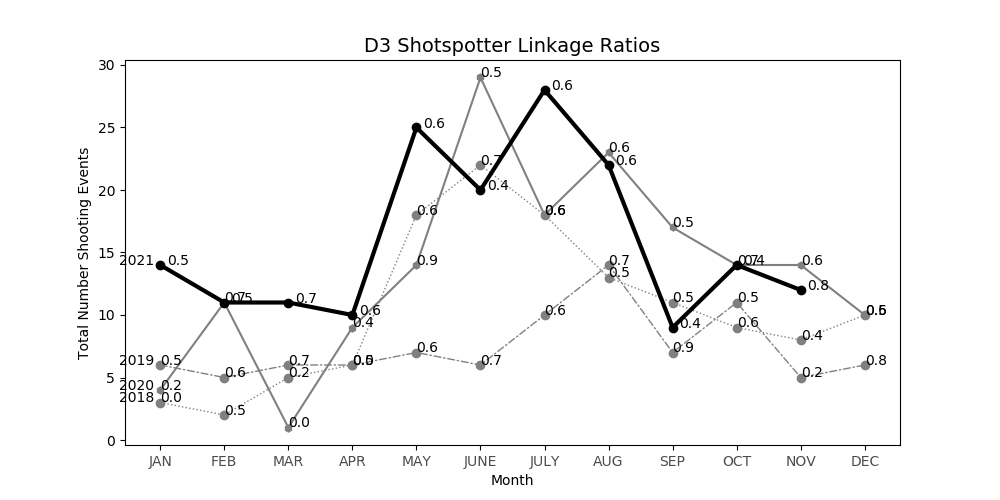

In [21]:
#Make plots
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=[10,5])

#2018 data
plt.plot(yrtot[0], 'o-',color='gray',linewidth=1,linestyle=':')
plt.text(-.65,yrtot[0][0], str(2018),color='k')
#2019 data
plt.plot(yrtot[1], 'o-',color='gray',linewidth=1,linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
plt.text(-.65,yrtot[1][0], str(2019),color='k')
#2020 data
plt.plot(yrtot[2], 'o-',color='gray',marker='h', markerfacecolor='gray', markeredgewidth=1,markersize=5, markevery=1)
plt.text(-.65,yrtot[2][0], str(2020),color='k')
#2021 data
plt.plot(yrtot[3][0:11], 'o-',color='k',linewidth=3)
plt.text(-.65,yrtot[3][0], str(2021),color='k')

#label points with linkage ratios
for i in np.arange(0,3,1):  #2018-2020
    for j in np.arange(0,12,1):
        plt.text(j,yrtot[i][j]+.01,str(round(yrratio[i][j],1)))
#2021
for j in np.arange(0,11,1):
        plt.text(j+.1,yrtot[3][j]-.01,str(round(yrratio[3][j],1)))
        
#complete and save graph
classes=["JAN","FEB","MAR","APR","MAY","JUNE","JULY","AUG","SEP","OCT","NOV","DEC"]
ps = np.arange(len(classes))
plt.xticks(ps, classes, alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Total Number Shooting Events')
plt.title("D3 Shotspotter Linkage Ratios",size=14)
plt.savefig("D3SSLR.png")
plt.show()

<IPython.core.display.Javascript object>


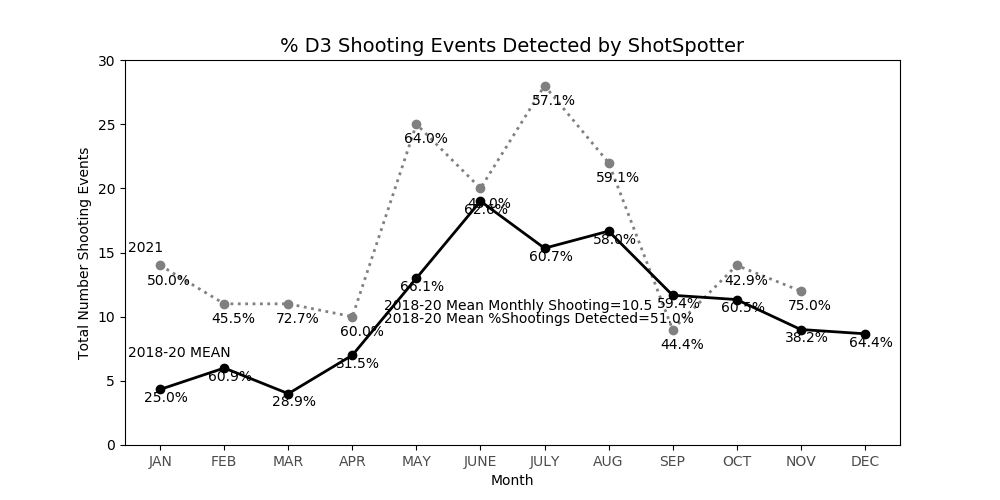

In [19]:
#Make plots
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=[10,5])
plt.ylim(0, 30)

#2018 data
#plt.plot(yrtot[0], 'o-',color='gray',linewidth=1,linestyle=':')
#plt.text(-.65,yrtot[0][0], str(2018),color='k')
#2019 data
#plt.plot(yrtot[1], 'o-',color='gray',linewidth=1)
#plt.text(-.65,yrtot[1][0], str(2019),color='k')
#2020 data
#plt.plot(yrtot[2], 'o-',color='gray',linewidth=2,linestyle=':')
#plt.text(-.65,yrtot[2][0], str(2020),color='k')

#label 2018-2020 points with linkage ratios
#for i in np.arange(0,3,1):  
#    for j in np.arange(0,12,1):
#        plt.text(j,yrtot[i][j]+.01,str(round(yrratio[i][j],1)))

#2021 data
plt.plot(yrtot[3][0:11], 'o-',color='gray',linewidth=2,linestyle=':')
plt.text(-.5,yrtot[3][0]+1, str(2021),color='k')
        
#Label 2021 points with linkage ratio
for j in np.arange(0,11,1):
        plt.text(j-.2,yrtot[3][j]-1.5,str(round(100*yrratio[3][j],1))+'%')

#Plot 2018-2020 average
ratio= [(g + h+i) / 3 for g, h,i in zip(yrratio[0],yrratio[1],yrratio[2])]
total= [(g + h+i) / 3 for g, h,i in zip(yrtot[0],yrtot[1],yrtot[2])]

plt.plot(total[0:12], 'o-',color='k',linewidth=2)
plt.text(-.5,total[0]+2.5, '2018-20 MEAN',color='k')
        
#Label 2018-2020 average with linkage ratio
for j in np.arange(0,12,1):        
    plt.text(j-.25,total[j]-1,str(round(100*ratio[j],1))+'%')
        
#complete and save graph
classes=["JAN","FEB","MAR","APR","MAY","JUNE","JULY","AUG","SEP","OCT","NOV","DEC"]
ps = np.arange(len(classes))
plt.xticks(ps, classes, alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Total Number Shooting Events')
plt.title("% D3 Shooting Events Detected by ShotSpotter",size=14)

plt.text(3.5,10.5,'2018-20 Mean Monthly Shooting='+str(np.mean(total)))
plt.text(3.5,9.5,'2018-20 Mean %Shootings Detected='+str(100*round(np.mean(ratio),2))+'%')


plt.savefig("D3SSLRmean.png")
plt.show()